In [6]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler

In [7]:
path = "/".join(os.getcwd().split('/')[:-1])

### Aisles Feature

In [8]:
aisles_df = pd.read_csv(path+'/data/aisles.csv')

In [9]:
aisles_df.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [10]:
# Checking missing values
aisles_df.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [11]:
aisles_df.nunique()

aisle_id    134
aisle       134
dtype: int64

### Department Feature

In [12]:
department_df = pd.read_csv(path+"/data/departments.csv")

In [13]:
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


#### Checking MISSING values

In [14]:
department_df.isnull().sum()

department_id    0
department       0
dtype: int64

#### Unique Values

In [15]:
department_df.nunique()

department_id    21
department       21
dtype: int64

#### Checking Duplicate Records

In [16]:
department_df.duplicated().sum()

0

### Products Table

In [17]:
products_df = pd.read_csv(path+"/data/products.csv")

In [18]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


#### Missing Values

In [19]:
products_df.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

#### Checking Duplicate Values

In [20]:
products_df.duplicated().sum()

0

#### Merging - Product, Aisle and department dataset

In [21]:
product_depart = pd.merge(products_df, department_df, how='left', left_on='department_id', right_on='department_id')

In [22]:
products_data = pd.merge(product_depart, aisles_df, how='left', left_on='aisle_id', right_on='aisle_id')

In [23]:
del product_depart, products_df, aisles_df, department_df

In [24]:
products_data.shape

(49688, 6)

#### Storing merged product data

In [25]:
products_data.to_csv(path+'/src/product_data.csv')

In [26]:
#Dataset shape
products_data.shape

(49688, 6)

In [27]:
#Missing Values in new dataset
products_data.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
department       0
aisle            0
dtype: int64

In [28]:
del products_data

### Order Product Prior

In [34]:
order_product_prior = pd.read_csv(path+'/data/order_products__prior.csv')

In [35]:
order_product_prior.shape

(32434489, 4)

In [36]:
order_product_prior.order_id.nunique()

3214874

In [37]:
order_product_prior.shape

(32434489, 4)

### Order Table

In [39]:
orders_df = pd.read_csv(path+"/data/orders.csv")

In [40]:
orders_df.shape

(3421083, 7)

In [41]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


#### Missing Values

In [42]:
orders_df.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

Interpretation:<br>
We've around 0.2M missing values in "Days Since Prior Order". These missing values are STRUCTURALLY MISSING so need to impute and remove these values.

#### Unique #Users

In [43]:
#Unique no. of users
orders_df.user_id.nunique()

206209

## Data Reduction

In [44]:
#taking sample of 50000 users out of 206209 users in order to reduce the dataset
sample_users = pd.Series(orders_df.user_id.unique()).sample(50000, random_state=42)

#Filter the existing dataset based on the sample and storing it in new dataframe
new_orders_df = orders_df[orders_df.user_id.isin(sample_users)]

#Now, filtering prior table which has 32M records
sample_prior_orders =new_orders_df[new_orders_df['eval_set']=='prior'].order_id.unique()
prior_data = order_product_prior[order_product_prior.order_id.isin(sample_prior_orders)]

In [45]:
del sample_users, order_product_prior

In [46]:
#Checking the update dataset after filtering 
prior_data.shape

(7927707, 4)

#### Storing sampled dataset

In [47]:
#Storing the updated dataset into new csv file
prior_data.to_csv(path+'/src/order_product_prior_data.csv')
new_orders_df.to_csv(path+'/src/orders_data.csv')

In [48]:
old_orders_df = orders_df.copy()
orders_df = new_orders_df.copy()
del new_orders_df

In [49]:
orders_df.shape

(831128, 7)

In [50]:
orders_df.eval_set.value_counts()

prior    781128
train     31826
test      18174
Name: eval_set, dtype: int64

In [51]:
orders_df.eval_set.value_counts()

prior    781128
train     31826
test      18174
Name: eval_set, dtype: int64

In [52]:
del orders_df

In [55]:
del prior_data

# Final Dataset

Final files:
1. Orders
2. Order Product Prior 
4. Product

#### Loading all data files

In [56]:
prior_data = pd.read_csv(path+'/src/order_product_prior_data.csv')
orders_df= pd.read_csv(path+'/src/orders_data.csv')
product_data= pd.read_csv(path+'/src/product_data.csv')

#### Prior Dataset Exploration

In [57]:
prior_data.head()

,Unnamed: 0,order_id,product_id,add_to_cart_order,reordered
0,56,6,40462,1,0
1,57,6,15873,2,0
2,58,6,41897,3,0
3,188,22,23909,1,1
4,189,22,22754,2,1


In [58]:
prior_data.shape

(7927707, 5)

#### Unique Orders

In [59]:
prior_data.order_id.nunique()

781128

#### Orders Dataset Exploration

In [60]:
orders_df.head()

,Unnamed: 0,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,45,2717275,5,prior,1,3,12,NaN
1,46,1909121,5,prior,2,0,16,11.0
2,47,2267326,5,prior,3,3,18,10.0
3,48,157374,5,prior,4,1,18,19.0
4,49,2196797,5,train,5,0,11,6.0


In [61]:
orders_df.user_id.nunique()

50000

#### Unique #Orderes

In [62]:
orders_df.order_id.nunique()

831128

#### Products Data Exploration

In [63]:
product_data.head()

,Unnamed: 0,product_id,product_name,aisle_id,department_id,department,aisle
0,0,1,Chocolate Sandwich Cookies,61,19,snacks,cookies cakes
1,1,2,All-Seasons Salt,104,13,pantry,spices seasonings
2,2,3,Robust Golden Unsweetened Oolong Tea,94,7,beverages,tea
3,3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen,frozen meals
4,4,5,Green Chile Anytime Sauce,5,13,pantry,marinades meat preparation


Text(0, 0.5, 'Frequency (No. of order)')

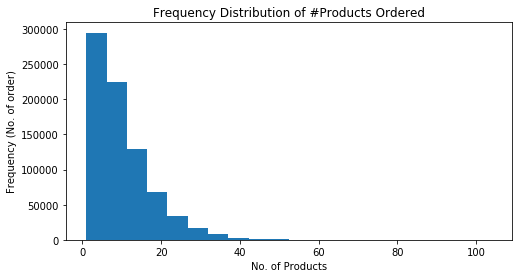

In [64]:
plt.figure(figsize=(8,4))
plt.hist(prior_data.groupby('order_id')['product_id'].count(), bins=20)
plt.title('Frequency Distribution of #Products Ordered')
plt.xlabel('No. of Products')
plt.ylabel('Frequency (No. of order)')

Text(0.5, 0, 'No. of Products')

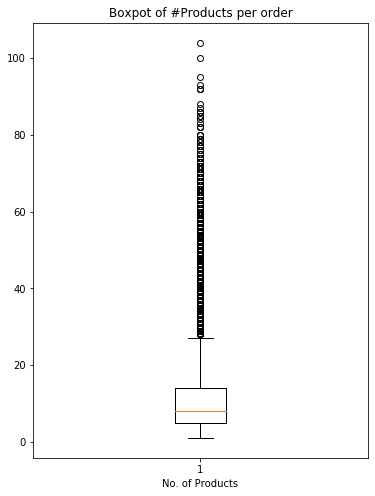

In [65]:
plt.figure(figsize=(6,8))
plt.boxplot(prior_data.groupby('order_id')['product_id'].count())
plt.title('Boxpot of #Products per order')
plt.xlabel('No. of Products')

In [66]:
prior_data.groupby('order_id')['product_id'].count().skew()

1.542634748038707

In [67]:
prior_data.groupby('order_id')['product_id'].count().kurtosis()

3.8310744806396815

In [68]:
product_order_count = prior_data.groupby('order_id')['product_id'].count()
product_order_count.std()

7.531841502066103

In [69]:
standardized_product_count = StandardScaler().fit_transform(product_order_count[:,np.newaxis])[:,0]

In [70]:
pd.Series(standardized_product_count).describe()

count    7.811280e+05
mean     9.118199e-17
std      1.000001e+00
min     -1.214717e+00
25%     -6.836380e-01
50%     -2.853288e-01
75%      5.112897e-01
max      1.246057e+01
dtype: float64

In [71]:
del standardized_product_count